<a href="https://colab.research.google.com/github/coyolxahuqui/Tareas-UIC/blob/main/vac16enero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
!pip install gensim
!pip install pyLDAvis
!pip install wordcloud
!pip install -U pip setuptools wheel
!pip install -U spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 27.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.2 which is incompatible.


In [ ]:
!ls /content/Lit1_file-2

/content/Lit1_file-2


In [ ]:
papers_location = '/content/Lit1_file-2'

In [ ]:
papers = pd.read_csv(papers_location)

In [ ]:
papers.sample(10)

file  \
227  Zasada et al. - 2013 - Seroprevalence of dipht...   
107  Mast et al. - 2015 - Evidence of Herd Immunity...   
251  Zieliński et al. - 2004 - The effectiveness o...   
29   Ramsay et al. - 1993 - Age-specific efficacy o...   
106  Aaby et al. - 2018 - Evidence of Increase in M...   
161  Halperin et al. - 1989 - Persistence of pertus...   
270  Gold et al. - 2010 - Use of the Australian Chi...   
165  Abzug et al. - 2007 - Pertussis Booster Vaccin...   
8    Zhang et al. - 2015 - A sera-epidemiological s...   
238  Lawrence et al. - 2004 - Surveillance of adver...   

                                                  text  
227  Zasada et al. BMC Infectious Diseases 2013, 13...  
107  Vaccine RepoRts\n\nn\nY\nQ\np\n/\nI\nl\n\ni\n\...  
251  Scandinavian Journal of Infectious Diseases\n\...  
29   Epidemiol. Infect. (1993), 111, 41-48\nCopyrig...  
106  Original research\npublished: 19 March 2018\nd...  
161  P\ne\nr\ns\ni\ns\nt\ne\nn\nc\ne\n \no\nf\n \np...  
270  Vaccine 28 (2010) 4308–4311\n\nContents lists ...  
165  ARTICLE\n\nPertussis Booster Vaccination in HI...  
8    Vaccine  33  (2015)  7183–7187\n\nContents  li...  
238  Article\n\nSurveillance of adverse events foll...

In [ ]:
papers.columns

Index(['file', 'text'], dtype='object')

In [ ]:
papers

file  \
0    Rohde et al. - 2014 - A cross‐sectional study ...   
1    Huang et al. - 2018 - A big pertussis outbreak...   
2    Nakayama et al. - 1999 - A clinical analysis o...   
3    Hochwald et al. - 2010 - A Pertussis Outbreak ...   
4    Hori et al. - 1994 - A randomized controlled t...   
..                                                 ...   
279  Kuno-Sakai et al. - 2004 - Verification of com...   
280  Van Der Lee et al. - 2018 - Whole-Cell or Acel...   
281  Van Der Lee et al. - 2018 - Whole-cell or acel...   
282  Estcourt et al. - 2020 - Whole-Cell Pertussis ...   
283  Tomoda y Ogura - Wo primary doses of diphtheri...   

                                                  text  
0    © 2014 John Wiley & Sons A/S.\nPublished by Jo...  
1    Vaccine xxx (2018) xxx–xxx\n\nContents lists a...  
2    Food and drug reactions and anaphylaxis\n\nA c...  
3    IMAJ • VOL 12 • MAy 2010\n\nOriginal articles\...  
4    Annals of Tropical Paediatrics\nInternational ...  
..                                                 ...  
279  Biologicals 32 (2004) 29–35\n\nBIOLOGICALS\n\n...  
280  CliniCal Trial\npublished: 24 January 2018\ndo...  
281  Vaccine xxx (2017) xxx–xxx\n\nContents lists a...  
282  Original Article\n\nWhole-Cell Pertussis Vacci...  
283  PII:  SO264-410X(97)00122-9 \n\nVaccine. V\n0 ...  

[284 rows x 2 columns]

In [ ]:
import re

In [ ]:
papers['clean_text'] = papers['text'].map(lambda x: re.sub('[,\.!?]', '', x))

In [ ]:
papers['clean_text']

0      © 2014 John Wiley & Sons A/S\nPublished by Joh...
1      Vaccine xxx (2018) xxx–xxx\n\nContents lists a...
2      Food and drug reactions and anaphylaxis\n\nA c...
3      IMAJ • VOL 12 • MAy 2010\n\nOriginal articles\...
4      Annals of Tropical Paediatrics\nInternational ...
                             ...                        
279    Biologicals 32 (2004) 29–35\n\nBIOLOGICALS\n\n...
280    CliniCal Trial\npublished: 24 January 2018\ndo...
281    Vaccine xxx (2017) xxx–xxx\n\nContents lists a...
282    Original Article\n\nWhole-Cell Pertussis Vacci...
283    PII:  SO264-410X(97)00122-9 \n\nVaccine V\n0 1...
Name: clean_text, Length: 284, dtype: object

In [ ]:
papers['clean_text'] = papers['clean_text'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [ ]:
papers['clean_text'].sample(10)

10     AAntibody responses and persistence in the two...
169    Pertussis immunization and\ncharacteristics re...
76     Clinical & Translational Immunology ;  doi: /\...
245    INFECTION AND IMMUNITY Dec  p –\n-//$(cid:) do...
185    Article\n\nhttps://doiorg//---w\n\nPrior expos...
85     Vaccine  () –\n\nEffect of injection site on r...
32     Toxicology Mechanisms & Methods :-   \nCopyrig...
25     ADVERSE  EVENTS  POST-DTaP  AND  DTwP \n\nVACC...
128    HUMAN VACCINES & IMMUNOTHERAPEUTICS     \n VOL...
206    Pediatr Infect Dis J ;:–\nCopyright ©  by Lipp...
Name: clean_text, dtype: object

In [ ]:
from wordcloud import WordCloud
def create_word_cloud(target_df, column_name):
  print('Joining all words into long text....')
  full_text = ','.join(list(target_df[column_name].values))
  wordcloud = WordCloud(background_color="black",
                        max_words=100,  # top 100 words in the
                        contour_width=2,
                        contour_color='yellow')
  print('Creating word cloud')
  wordcloud.generate(full_text)
  return wordcloud

Joining all words into long text....
Creating word cloud


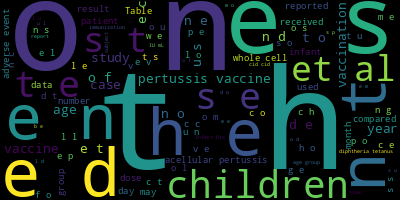

In [ ]:
wordcloud = create_word_cloud(papers, 'clean_text')
wordcloud.to_image()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def create_document_term_matrix(dataframe, column_name):
  cv = CountVectorizer(analyzer='word')
  data = cv.fit_transform(dataframe[column_name])
  df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
  df_dtm.index=dataframe.index
  return df_dtm

In [ ]:
df_dtm = create_document_term_matrix(papers, 'clean_text')

In [ ]:
df_dtm.sample(10)

__  ___  _i  _l  _l_  _l_l  _ma  _rre  _u  a__l  ...  ﬂuctuating  \
272   0    0   0   0    0     0    0     0   0     0  ...           0   
273   0    0   0   0    0     0    0     0   0     0  ...           0   
259   0    0   0   0    0     0    0     0   0     0  ...           0   
149   0    0   0   0    0     0    0     0   0     0  ...           0   
41    0    0   0   0    0     0    0     0   0     0  ...           0   
253   0    0   0   0    0     0    0     0   0     0  ...           0   
79    0    0   0   0    0     0    0     0   0     0  ...           0   
173   0    0   0   0    0     0    0     0   0     0  ...           0   
233   0    0   0   0    0     0    0     0   0     0  ...           0   
167   0    0   0   0    0     0    0     0   0     0  ...           0   

     ﬂuctuations  ﬂuenzae  ﬂuid  ﬂuo  ﬂuorenscence  ﬂuorescence  ﬂuorescent  \
272            0        0     0    0             0            0           0   
273            0        0     0    0             0            0           0   
259            0        0     0    0             0            0           0   
149            0        0     0    0             0            0           0   
41             0        0     0    0             0            0           0   
253            0        0     0    0             0            0           0   
79             0        0     0    0             0            0           0   
173            0        0     0    0             0            0           0   
233            0        0     0    0             0            0           0   
167            0        0     0    0             0            0           0   

     ﬂuorometry  \
272           0   
273           0   
259           0   
149           0   
41            0   
253           0   
79            0   
173           0   
233           0   
167           0   

     ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ  
272                                                  0                                            
273                                                  0                                            
259                                                  0                                            
149                                                  0                                            
41                                                   0                                            
253                                                  0                                            
79                                                   0                                            
173                                                  0                                            
233                                                  0                                            
167                                                  0                                            

[10 rows x 37787 columns]

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['has', 'been', 're', 'com', 'edu', 'use'])

In [ ]:
def convert_sentences_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [ ]:
def remove_all_stop_words(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

In [ ]:
text_to_list = papers.clean_text.values.tolist()

In [ ]:
len(text_to_list)

284

In [ ]:
text_to_list[0]

"©  John Wiley & Sons A/S\nPublished by John Wiley & Sons Ltd\n\nTransplant Infectious Disease ISSN -\n\nA cross-sectional study of tetanus and diphtheria\nantibody concentrations post vaccination among\nlung transplant patients compared with healthy\nindividuals\n\nKA Rohde KC Cunningham KM Henriquez AR Nielsen SL\nWorzella MS Hayney A cross-sectional study of tetanus and\ndiphtheria antibody concentrations post vaccination among lung\ntransplant patients compared with healthy individuals\nTranspl Infect Dis : : – All rights reserved\n\nAbstract: Background Lung transplant (LuTx) patients are\nroutinely immunized against tetanus and diphtheria However few\nstudies have been done to measure serologic immunity in the\ntransplant population\nObjectives The primary objective of this study was to compare\ntetanus and diphtheria antibody concentrations in LuTx vs healthy\nsubjects\nMethods Serum was used from an available sample of  total\nindividuals (n =  healthy; n =  LuTx) Tetanus and d

In [ ]:
text_as_words = list(convert_sentences_to_words(text_to_list))

In [ ]:
len(text_as_words)

284

In [ ]:
print(text_as_words[0])

['john', 'wiley', 'sons', 'published', 'by', 'john', 'wiley', 'sons', 'ltd', 'transplant', 'infectious', 'disease', 'issn', 'cross', 'sectional', 'study', 'of', 'tetanus', 'and', 'diphtheria', 'antibody', 'concentrations', 'post', 'vaccination', 'among', 'lung', 'transplant', 'patients', 'compared', 'with', 'healthy', 'individuals', 'ka', 'rohde', 'kc', 'cunningham', 'km', 'henriquez', 'ar', 'nielsen', 'sl', 'worzella', 'ms', 'hayney', 'cross', 'sectional', 'study', 'of', 'tetanus', 'and', 'diphtheria', 'antibody', 'concentrations', 'post', 'vaccination', 'among', 'lung', 'transplant', 'patients', 'compared', 'with', 'healthy', 'individuals', 'transpl', 'infect', 'dis', 'all', 'rights', 'reserved', 'abstract', 'background', 'lung', 'transplant', 'lutx', 'patients', 'are', 'routinely', 'immunized', 'against', 'tetanus', 'and', 'diphtheria', 'however', 'few', 'studies', 'have', 'been', 'done', 'to', 'measure', 'serologic', 'immunity', 'in', 'the', 'transplant', 'population', 'objectives'

In [ ]:
clean_words = remove_all_stop_words(text_as_words)

In [ ]:
len(clean_words)

284

In [ ]:
len(clean_words[0])

2312

In [ ]:
print(clean_words[:1][0][:20])

['john', 'wiley', 'sons', 'published', 'john', 'wiley', 'sons', 'ltd', 'transplant', 'infectious', 'disease', 'issn', 'cross', 'sectional', 'study', 'tetanus', 'diphtheria', 'antibody', 'concentrations', 'post']


In [ ]:
bigram = gensim.models.Phrases(clean_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[clean_words], threshold=100)

In [ ]:
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [ ]:
clean_words_bigrams = make_bigrams(clean_words)

In [ ]:
clean_words_lemmatized = lemmatization(clean_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
print(clean_words_lemmatized[:1][0][:100])

['john_wiley', 'son', 'transplant', 'infectious', 'disease', 'issn', 'study', 'diphtheria', 'antibody', 'concentration', 'post', 'vaccination', 'lung_transplant', 'patient', 'compare', 'healthy_individual', 'diphtheria', 'antibody', 'concentration', 'post', 'vaccination', 'lung_transplant', 'patient', 'compare', 'healthy_individual', 'transpl', 'rights_reserve', 'lung_transplant', 'lutx', 'patient', 'routinely', 'immunize', 'tetanus', 'diphtheria', 'however', 'study', 'do', 'measure', 'serologic', 'immunity', 'transplant', 'population', 'objective', 'primary', 'objective', 'study', 'compare', 'diphtheria', 'antibody', 'concentration', 'lutx', 'healthy', 'subject', 'method', 'use', 'available', 'sample', 'total', 'individual', 'healthy', 'diphtheria', 'antibody', 'concentration', 'measure', 'use', 'enzyme_linked', 'immunosorbant', 'assay', 'method', 'result', 'statistically_signiﬁcant', 'difference', 'tetanus', 'diphtheria', 'antibody', 'concentration', 'find', 'group', 'median', 'conce

In [ ]:
print(len(clean_words))
print(len(clean_words[0]))
print(len(clean_words[99]))

284
2312
1963


In [ ]:
print(len(clean_words_lemmatized))
print(len(clean_words_lemmatized[0]))
print(len(clean_words_lemmatized[99]))

284
1634
1547


In [ ]:
import gensim.corpora as corpora

In [ ]:
id2word = corpora.Dictionary(clean_words_lemmatized)
texts = clean_words_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
print(corpus[:1][0][:100])

[(0, 3), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 6), (7, 9), (8, 1), (9, 3), (10, 2), (11, 2), (12, 7), (13, 1), (14, 1), (15, 1), (16, 2), (17, 81), (18, 1), (19, 3), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 3), (29, 1), (30, 5), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 18), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 6), (44, 4), (45, 1), (46, 2), (47, 1), (48, 2), (49, 9), (50, 1), (51, 1), (52, 2), (53, 21), (54, 5), (55, 2), (56, 2), (57, 2), (58, 55), (59, 2), (60, 2), (61, 2), (62, 3), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 4), (70, 1), (71, 1), (72, 2), (73, 2), (74, 7), (75, 1), (76, 1), (77, 1), (78, 3), (79, 2), (80, 3), (81, 1), (82, 6), (83, 1), (84, 7), (85, 2), (86, 1), (87, 3), (88, 2), (89, 1), (90, 6), (91, 1), (92, 2), (93, 1), (94, 10), (95, 6), (96, 1), (97, 64), (98, 1), (99, 9)]


In [ ]:
print(len(clean_words_lemmatized))
print(len(clean_words_lemmatized[0]))
print(len(clean_words_lemmatized[99]))

284
1634
1547


In [ ]:
num_topics = 6

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=100,chunksize=1000,passes=50,per_word_topics=True)

In [ ]:
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.026*"pertussis" + 0.024*"case" + 0.020*"child" + 0.019*"vaccine" + '
  '0.017*"year" + 0.017*"age" + 0.016*"vaccination" + 0.013*"study" + '
  '0.007*"month" + 0.007*"disease"'),
 (1,
  '0.045*"vaccine" + 0.022*"pertussis" + 0.019*"child" + 0.017*"study" + '
  '0.014*"reaction" + 0.013*"group" + 0.013*"vaccination" + 0.011*"dose" + '
  '0.010*"acellular" + 0.010*"booster"'),
 (2,
  '0.050*"pertussis" + 0.022*"vaccine" + 0.013*"child" + 0.012*"case" + '
  '0.009*"patient" + 0.009*"study" + 0.008*"year" + 0.008*"efficacy" + '
  '0.008*"culture" + 0.008*"infection"'),
 (3,
  '0.041*"vaccine" + 0.020*"report" + 0.014*"child" + 0.014*"vaccination" + '
  '0.011*"follow" + 0.011*"year" + 0.010*"reaction" + 0.009*"study" + '
  '0.008*"dose" + 0.008*"adverse_event"'),
 (4,
  '0.040*"pertussis" + 0.023*"vaccine" + 0.015*"year" + 0.015*"child" + '
  '0.013*"vaccination" + 0.012*"age" + 0.011*"study" + 0.010*"group" + '
  '0.010*"level" + 0.010*"booster"'),
 (5,
  '0.026*"antibody" + 0.0

In [ ]:
document_topics = lda_model[corpus]



In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=clean_words_lemmatized):
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus)

<ipython-input-64-086b1c1da23e>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-64-086b1c1da23e>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-64-086b1c1da23e>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-64-086b1c1da23e>:13: FutureWarning: The frame.append method is deprecated and will be removed from p

In [ ]:
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head()

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               5              0.5486   
1            1               0              0.7334   
2            2               1              0.5135   
3            3               2              0.8128   
4            4               1              0.7847   

                                            Keywords  \
0  antibody, patient, vaccine, titer, child, resp...   
1  pertussis, case, child, vaccine, year, age, va...   
2  vaccine, pertussis, child, study, reaction, gr...   
3  pertussis, vaccine, child, case, patient, stud...   
4  vaccine, pertussis, child, study, reaction, gr...   

                                                Text  
0  [john_wiley, son, transplant, infectious, dise...  
1  [vaccine, available_sciencedirect, vaccine, bi...  
2  [food_drug, reaction, anaphylaxis, clinical, a...  
3  [imaj, vol, original, article, pertussis, outb...  
4  [annals_tropical, paediatric, international, c...

In [ ]:
print(df_dominant_topic)

     Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0              0               5              0.5486   
1              1               0              0.7334   
2              2               1              0.5135   
3              3               2              0.8128   
4              4               1              0.7847   
..           ...             ...                 ...   
279          279               1              0.6111   
280          280               4              0.9997   
281          281               4              0.9817   
282          282               0              0.4816   
283          283               5              0.3653   

                                              Keywords  \
0    antibody, patient, vaccine, titer, child, resp...   
1    pertussis, case, child, vaccine, year, age, va...   
2    vaccine, pertussis, child, study, reaction, gr...   
3    pertussis, vaccine, child, case, patient, stud...   
4    vaccine, pertussis, child, study

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df_dominant_topic.to_csv('Vacunas.csv', index=True)

In [ ]:
palabras = dict(lda_model.show_topic(5, topn=10))

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color= 'white').generate_from_frequencies(palabras)

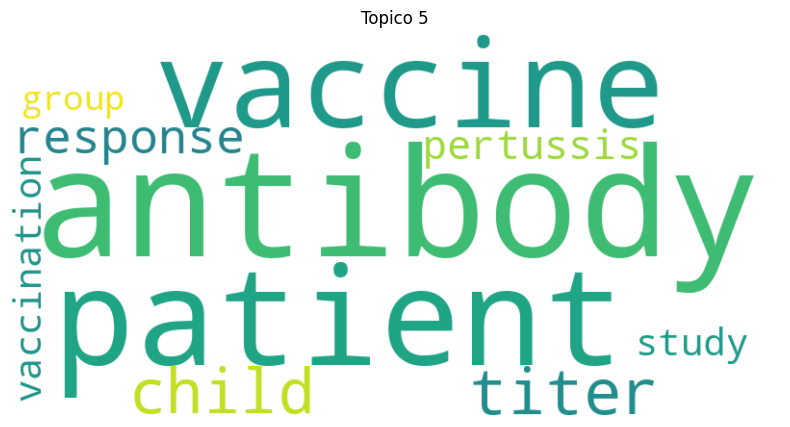

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Topico 5')
plt.axis('off')
plt.show()

In [ ]:
wordcloud.to_file('topico5.png')

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text', 'id', 'datum']
#df_dominant_topic.head(20)


In [ ]:
primer_documento = corpus[2]


In [ ]:
topico_dominante = lda_model[primer_documento]

In [ ]:
print(f'Primer doc: {topico_dominante}')

Primer doc: ([(1, 0.5134829), (3, 0.30193588), (5, 0.18416756)], [(7, [1, 3, 5]), (10, [1, 3, 5]), (12, [1, 3, 5]), (16, [1, 5]), (17, [5, 1]), (19, [3, 5, 1]), (25, [1, 3, 5]), (27, [3, 1, 5]), (28, [1, 3, 5]), (33, [1, 3]), (36, [1, 5, 3]), (38, [3, 1, 5]), (48, [1, 3, 5]), (53, [1, 3, 5]), (58, [1, 5, 3]), (60, [1, 3, 5]), (62, [1, 3, 5]), (64, [1, 3, 5]), (68, [1, 3, 5]), (69, [1, 3, 5]), (77, [1, 3]), (84, [3, 1, 5]), (86, [1, 5, 3]), (88, [3, 1, 5]), (90, [1, 3, 5]), (94, [1, 5, 3]), (95, [1, 3, 5]), (97, [1, 5, 3]), (98, [1, 3, 5]), (102, [1, 3, 5]), (118, [1, 3, 5]), (120, [3, 1, 5]), (122, [1, 3, 5]), (127, [1, 5, 3]), (130, [3, 1, 5]), (138, [1, 5, 3]), (143, [1, 3, 5]), (147, [1, 5, 3]), (149, [5, 1, 3]), (152, [1, 5, 3]), (153, [1, 5, 3]), (154, [1, 5]), (159, [1, 3, 5]), (160, [1, 3, 5]), (161, [1, 3, 5]), (163, [3, 1, 5]), (164, [5, 1, 3]), (169, [3, 1, 5]), (170, [3, 1, 5]), (180, [3, 1, 5]), (181, [3, 1, 5]), (190, [3, 1, 5]), (195, [1, 3, 5]), (196, [1, 5, 3]), (205, [

In [ ]:
print(document_topics[0])

([(0, 0.08655457), (1, 0.3462833), (4, 0.018479628), (5, 0.5484766)], [(0, [5, 1, 0]), (1, [1, 5, 0, 4]), (2, [5, 1, 0]), (3, [5, 0, 1]), (4, [5, 1, 0, 4]), (5, [5, 1, 0]), (6, [5, 1, 0, 4]), (7, [1, 5, 0, 4]), (8, [5, 1, 0]), (9, [5, 1, 0, 4]), (10, [5, 1, 0, 4]), (11, [1, 0, 4]), (12, [1, 5, 0, 4]), (13, [1]), (14, [0, 4]), (15, [5, 0, 4]), (16, [5, 1, 4]), (17, [5, 1, 4, 0]), (18, [5, 1, 4]), (19, [5, 1, 0]), (20, [5, 1, 0, 4]), (21, [1, 0]), (22, [5, 1, 0, 4]), (23, [5, 1, 4, 0]), (24, [1, 5, 0]), (25, [1, 5, 0]), (26, [1]), (27, [5, 1, 0]), (28, [1, 5, 0, 4]), (29, [5, 0, 1]), (30, [1, 5, 0, 4]), (31, [5, 1, 0, 4]), (32, [1]), (33, [1, 0]), (34, [0, 5, 1]), (35, [1, 0]), (36, [1, 5, 4, 0]), (37, [1, 5]), (38, [1, 5, 0, 4]), (39, [5, 1, 0]), (40, [5, 0, 1]), (41, [1, 5, 0, 4]), (42, [5, 1, 0, 4]), (43, [5, 1, 0, 4]), (44, [1, 0, 4]), (45, [0, 1]), (46, [1, 0, 5, 4]), (47, [5, 1, 0]), (48, [1, 5, 0, 4]), (49, [5, 0, 1, 4]), (50, [1, 5, 0, 4]), (51, [5, 1, 0]), (52, [0, 1, 4]), (53, 

In [ ]:
dominant_topics = max(document_topics[0], key=lambda x: x[1][0])

In [ ]:
print(f'Tópico: {dominant_topics}')

Tópico: [(0, 0.08657313), (1, 0.34630978), (4, 0.018405516), (5, 0.5485056)]


In [ ]:
for i, documento in enumerate(corpus):
  topico_dominante = lda_model[documento]
  print(f'Doc {i+1}: Top dom {topico_dominante}')

Doc 1: Top dom ([(0, 0.08661621), (1, 0.34636632), (4, 0.018241482), (5, 0.5485701)], [(0, [5, 1, 0]), (1, [1, 5, 0, 4]), (2, [5, 1, 0]), (3, [5, 0, 1]), (4, [5, 1, 0, 4]), (5, [5, 1, 0]), (6, [5, 1, 0, 4]), (7, [1, 5, 0, 4]), (8, [5, 1, 0]), (9, [5, 1, 0, 4]), (10, [5, 1, 0, 4]), (11, [1, 0, 4]), (12, [1, 5, 0, 4]), (13, [1]), (14, [0, 4]), (15, [5, 0, 4]), (16, [5, 1, 4]), (17, [5, 1, 4, 0]), (18, [5, 1, 4]), (19, [5, 1, 0]), (20, [5, 1, 0, 4]), (21, [1, 0]), (22, [5, 1, 0, 4]), (23, [5, 1, 4, 0]), (24, [1, 5, 0]), (25, [1, 5, 0]), (26, [1]), (27, [5, 1, 0]), (28, [1, 5, 0, 4]), (29, [5, 0, 1]), (30, [1, 5, 0, 4]), (31, [5, 1, 0, 4]), (32, [1]), (33, [1, 0]), (34, [0, 5, 1]), (35, [1, 0]), (36, [1, 5, 0, 4]), (37, [1, 5]), (38, [1, 5, 0, 4]), (39, [5, 1, 0]), (40, [5, 0, 1]), (41, [1, 5, 0, 4]), (42, [5, 1, 0, 4]), (43, [5, 1, 0, 4]), (44, [1, 0, 4]), (45, [0, 1]), (46, [1, 0, 5, 4]), (47, [5, 1, 0]), (48, [1, 5, 0, 4]), (49, [5, 0, 1, 4]), (50, [1, 5, 0, 4]), (51, [5, 1, 0]), (52, [

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Doc 188: Top dom ([(0, 0.28046313), (4, 0.7192113)], [(4, [4, 0]), (5, [4, 0]), (6, [4, 0]), (7, [4, 0]), (8, [4, 0]), (10, [4, 0]), (12, [4, 0]), (16, [4, 0]), (17, [4]), (18, [4, 0]), (22, [4, 0]), (24, [4, 0]), (28, [4, 0]), (30, [4, 0]), (36, [4, 0]), (38, [4, 0]), (43, [4, 0]), (48, [4, 0]), (49, [4, 0]), (50, [4, 0]), (52, [0, 4]), (53, [4, 0]), (54, [4, 0]), (58, [4]), (60, [4, 0]), (62, [4, 0]), (66, [0, 4]), (68, [4, 0]), (69, [0, 4]), (79, [4, 0]), (80, [4, 0]), (84, [4, 0]), (85, [0, 4]), (86, [4, 0]), (87, [4, 0]), (91, [0, 4]), (94, [4, 0]), (95, [4, 0]), (97, [4, 0]), (98, [4, 0]), (99, [4, 0]), (102, [4, 0]), (106, [0, 4]), (112, [4, 0]), (113, [4, 0]), (117, [4, 0]), (120, [4, 0]), (122, [4, 0]), (127, [4, 0]), (128, [4, 0]), (130, [4, 0]), (131, [0, 4]), (132, [0, 4]), (137, [4, 0]), (138, [4, 0]), (143, [4, 0]), (146, [0, 4]), (147, [4, 0]), (151, [4, 0]), (152, [4, 0]), (153, [4, 0]), (158, [4, 0]), (159, [4, 0]), (160, [4, 0]), (161, [4, 0]), (163, [4, 0]), (164, [4

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
resultados = []


In [ ]:
for i, documento in enumerate(corpus):
  topico_dominante = lda_model[documento]
  resultados.append({'Documento':
                     topico_dominante})

In [ ]:
df = pd.DataFrame(resultados)

In [ ]:
print(df)

                                             Documento
0    ([(0, 0.08661043), (1, 0.34635904), (4, 0.0182...
1    ([(0, 0.73341227), (2, 0.024028253), (4, 0.242...
2    ([(1, 0.5134833), (3, 0.30193537), (5, 0.18416...
3    ([(0, 0.1867241), (2, 0.8128054)], [(4, [2, 0]...
4    ([(1, 0.78466743), (5, 0.21472178)], [(1, [1, ...
..                                                 ...
279  ([(1, 0.6111387), (4, 0.2761232), (5, 0.112410...
280  ([(4, 0.99971163)], [(1, [4]), (4, [4]), (6, [...
281  ([(1, 0.018036919), (4, 0.9816826)], [(1, [4, ...
282  ([(0, 0.48155993), (1, 0.2976185), (3, 0.16812...
283  ([(1, 0.21425605), (2, 0.09753338), (4, 0.3217...

[284 rows x 1 columns]


In [ ]:
df.to_csv('Resultados.csv', index=False)

In [ ]:
dominant_topics = max(document_topics[1], key=lambda x: x[1][0])

In [ ]:
dominant_topics = max(document_topics[2], key=lambda x: x[1][0])

In [ ]:
print(f'Tópico: {dominant_topics}')

Tópico: [(7, [1, 3, 5]), (10, [1, 3, 5]), (12, [1, 3, 5]), (16, [1, 5]), (17, [5, 1]), (19, [3, 5, 1]), (25, [1, 3, 5]), (27, [3, 1, 5]), (28, [1, 3, 5]), (33, [1, 3]), (36, [1, 5, 3]), (38, [3, 1, 5]), (48, [1, 3, 5]), (53, [1, 3, 5]), (58, [1, 5, 3]), (60, [1, 3, 5]), (62, [1, 3, 5]), (64, [1, 3, 5]), (68, [1, 3, 5]), (69, [1, 3, 5]), (77, [1, 3]), (84, [3, 1, 5]), (86, [1, 5, 3]), (88, [3, 1, 5]), (90, [1, 3, 5]), (94, [1, 5, 3]), (95, [1, 3, 5]), (97, [1, 5, 3]), (98, [1, 3, 5]), (102, [1, 3, 5]), (118, [1, 3, 5]), (120, [3, 1, 5]), (122, [1, 3, 5]), (127, [1, 5, 3]), (130, [3, 1, 5]), (138, [1, 5, 3]), (143, [1, 3, 5]), (147, [1, 5, 3]), (149, [5, 1, 3]), (152, [1, 5, 3]), (153, [1, 5, 3]), (154, [1, 5]), (159, [1, 3, 5]), (160, [1, 3, 5]), (161, [1, 3, 5]), (163, [3, 1, 5]), (164, [5, 1, 3]), (169, [3, 1, 5]), (170, [3, 1, 5]), (180, [3, 1, 5]), (181, [3, 1, 5]), (190, [3, 1, 5]), (195, [1, 3, 5]), (196, [1, 5, 3]), (205, [1, 5, 3]), (216, [3, 1, 5]), (217, [1, 5, 3]), (221, [3, 

In [ ]:
for i, doc_topics in enumerate(document_topics): dominant_topics = max(doc_topics, key=lambda x:x[1][0])
print(f'Documento {i + 1}: Topico{dominant_topics}')

IndexError: list index out of range

In [ ]:
dominant_topics = []
for topics in document_topics:
    if topics:
        dominant_topics.append(max(topics, key=lambda x: x[1])[0])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
dominant_topics = [max(topics, key=lambda x: x[1])[0] for topics in document_topics if topics]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
dominant_topics = [max(topics, key=lambda x: x[1])[0] for topics in document_topics]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
doc_lda

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install pyldavis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 19.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn

In [ ]:
!pip install gensim
!pip install pyLDAvis
!pip install wordcloud
!pip install -U pip setuptools wheel
!pip install -U spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 82.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 30.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.2 which is incompatible.


In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis
import os

ModuleNotFoundError: No module named 'pyLDAvis'

In [ ]:
pyLDAvis.enable_notebook()

NameError: name 'pyLDAvis' is not defined

In [ ]:
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.076962  0.050481       1        1  24.034932
1      0.013220 -0.078524       2        1  22.647462
3     -0.125492 -0.075680       3        1  18.348127
4      0.074065  0.002667       4        1  15.926997
2     -0.023535  0.115807       5        1  11.912054
5      0.138704 -0.014751       6        1   7.130429, topic_info=          Term          Freq         Total Category  logprob  loglift
265  pertussis  14139.000000  14139.000000  Default  30.0000  30.0000
17    antibody   2788.000000   2788.000000  Default  29.0000  29.0000
514       case   4646.000000   4646.000000  Default  28.0000  28.0000
257    patient   2168.000000   2168.000000  Default  27.0000  27.0000
327   response   2190.000000   2190.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
196      level    188.944591   1886.524481   Topic6  -5.3380   0.3398
450       year    247.827486   6421.531459   Topic6  -5.0667  -0.6139
226      month    207.031772   2981.071672   Topic6  -5.2466  -0.0264
143       high    177.748410   2455.574203   Topic6  -5.3991   0.0151
7          age    164.009436   5322.197963   Topic6  -5.4795  -0.8389

[521 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
457       1  0.127155  acellular
457       2  0.436891  acellular
457       3  0.081872  acellular
457       4  0.206129  acellular
457       5  0.115200  acellular
...     ...       ...        ...
450       2  0.146694       year
450       3  0.165381       year
450       4  0.208673       year
450       5  0.083313       year
450       6  0.038620       year

[1223 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 5, 3, 6])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


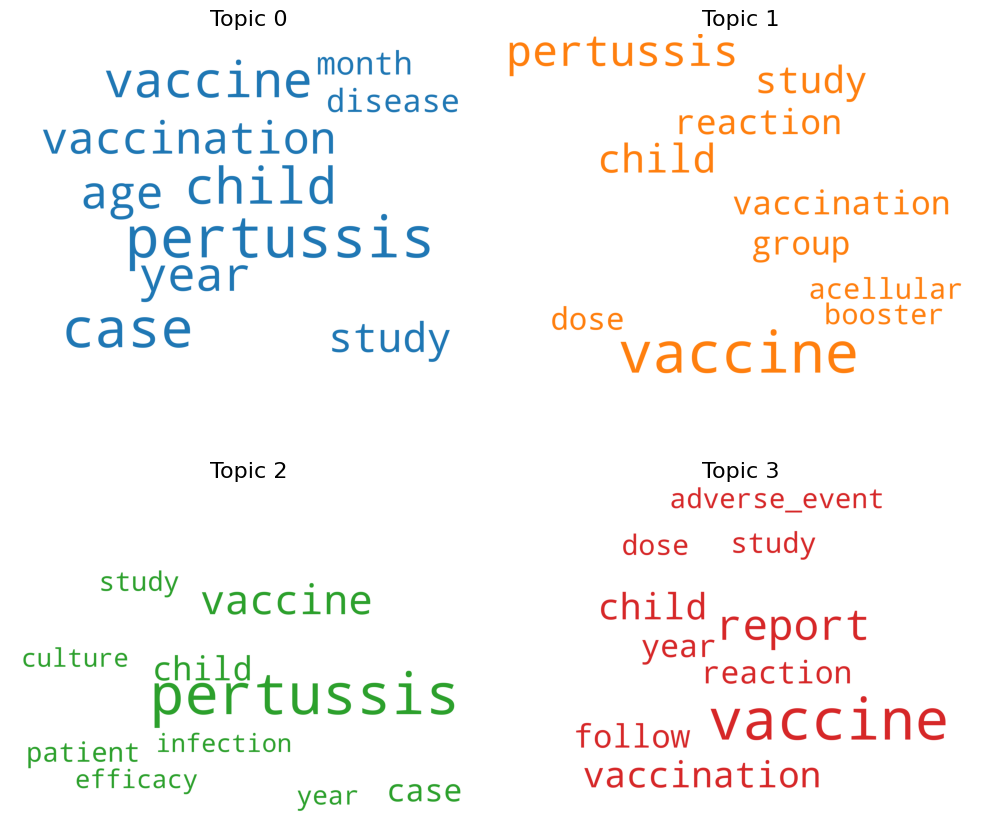

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus,total_docs=284))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.26118099854644


In [ ]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.3574491522508115


In [ ]:
print (corpus[0][0:20])


[(0, 3), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 6), (7, 9), (8, 1), (9, 3), (10, 2), (11, 2), (12, 7), (13, 1), (14, 1), (15, 1), (16, 2), (17, 81), (18, 1), (19, 3)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#TFinding the dominant topic in each sentence

def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

     # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
# Show
df_dominant_topic.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: '<' not supported between instances of 'int' and 'tuple'